## **Project 1**: *Data PreProcessing*


Using a Python version 3.10 or newer
1. Update pip: `python -m pip install --upgrade pip`
1. Install the requirements `pip install -r requirements.txt`

You will now have the required dependencies to run our Python app.

- pandas
- numpy
- matplotlib
- ipykernal (for Jupiter notebook)

### Exploring Data Preprocessing Topics

- Missing Values
- Duplicate Data
- Outliers
- Aggregation
- Discretization
- Principle Components Analysis
- Sampling
- Testing/Training Split
- Saving a dataframe
- Dropping fields
- Means and Standard Deviation
- Concatenating Rows and Columns
- Calculated Fields
- Feature Normalization
- Shuffling dataframes
- Sorting dataframes

**Description Of The Attributes**
| Column      | Description                                                                                                      |
|-------------|------------------------------------------------------------------------------------------------------------------|
| age         | Age in years                                                                                                     |
| sex         | Sex (1 = male; 0 = female)                                                                                       |
| cp          | Chest pain type (0: typical angina, 1: atypical angina, 2: non-anginal pain, 3: asymptomatic)                    |
| trestbps    | Resting blood pressure (in mm Hg on admission to the hospital)                                                   |
| chol        | Serum cholesterol in mg/dl                                                                                       |
| fbs         | Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)                                                            |
| restecg     | Resting electrocardiograph results (0: normal, 1: ST-T wave abnormality, 2: probable or definite LV hypertrophy) |
| thalach     | Maximum heart rate achieved                                                                                      |
| exang       | Exercise induced angina (1 = yes; 0 = no)                                                                        |
| oldpeak     | ST depression induced by exercise relative to rest                                                               |
| slope       | The slope of the peak exercise ST segment (0: upsloping, 1: flat, 2: downsloping)                                |
| ca          | Number of major vessels (0-3) colored by fluoroscope                                                             |
| thal        | 0 = normal; 1 = fixed defect; 2 = reversible defect                                                              |
| condition   | 0 = no disease, 1 = disease                                                                                      |


##### Duplicate Data, Missing Values, Outliers

Number of instances = 303
Number of attributes = 13
       age       sex     cp trestbps   chol    fbs  restecg  thalach  exang  \
0    956.0  3.141526  123.0     9345   23.0  0.369     23.0    0.369  0.369   
1     67.0  1.000000    4.0      120  229.0  0.000      2.0  129.000      1   
2     37.0  1.000000    3.0      130  250.0  0.000      0.0  187.000      0   
3     41.0  0.000000    2.0      130  204.0  0.000      2.0  172.000      0   
4     56.0  1.000000    2.0      120  236.0  0.000      0.0  178.000      0   
..     ...       ...    ...      ...    ...    ...      ...      ...    ...   
298   45.0  1.000000    1.0      110  264.0  0.000      0.0  132.000      0   
299   68.0  1.000000    4.0      144  193.0  1.000      0.0  141.000      0   
300   57.0  1.000000    4.0      130  131.0  0.000      0.0  115.000      1   
301   57.0  0.000000    2.0      130  236.0  0.000      2.0  174.000      0   
302   38.0  1.000000    3.0      138  175.0  0.000      0.0  173.000      0   


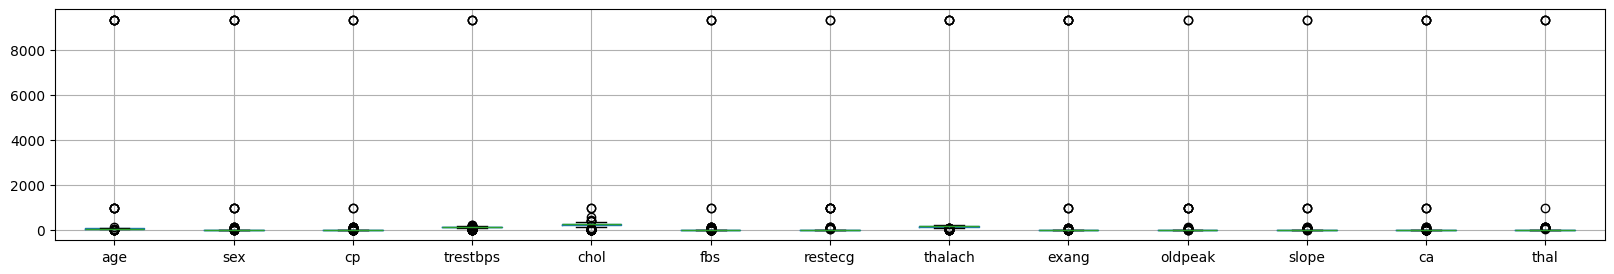

Number of rows before removing outliers = 302
Number of rows after removing outliers = 0
Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]
Index: []


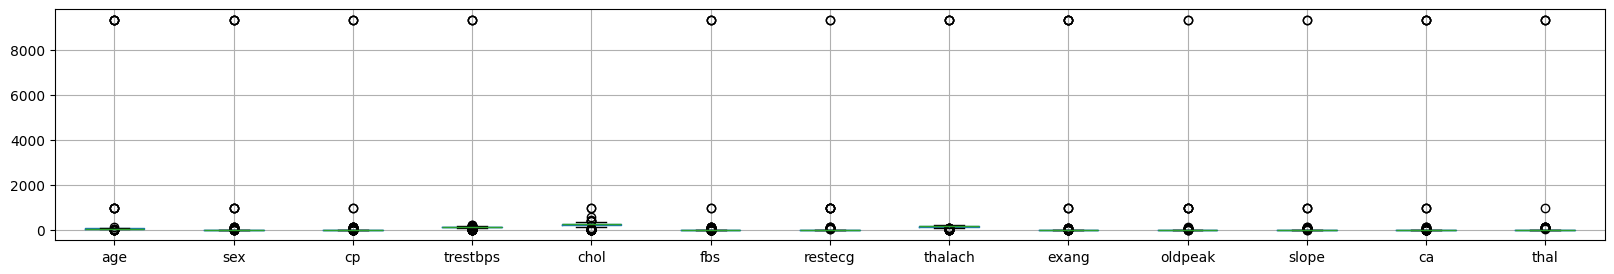

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore

data = pd.read_csv('data/heart_disease.csv')
data.columns = ['age', 'sex', 'cp', 'trestbps',
                'chol', 'fbs', 'restecg', 'thalach',
                'exang', 'oldpeak', 'slope', 'ca',
                'thal', 'disease']
data = data.drop(['disease'],axis=1)

# Shape of the dataset
print(f'Number of instances = {data.shape[0]}')
print(f'Number of attributes = {data.shape[1]}')
print(data)

# Duplicate Data
dups = data.duplicated()
print(f'Number of duplicate rows = {dups.sum()}\n')
print('Removing duplicate rows\n')
data2 = data.drop_duplicates()
print(f'Number of instances after dropping duplicates = {data2.shape[0]}')
print(data2)

# Missing Values replace with NaN
data3 = data2.replace('?', np.nan)

# Convert columns to numeric, coercing errors
for col in data3.columns:
    data3[col] = pd.to_numeric(data3[col], errors='coerce')
    
print(data3)

print('Number of missing values:')
for col in data3.columns:
    print(f'\t{col}: {data3[col].isna().sum()}')

# Missing Values replace with Median value of attribute
print('Replace missing values with median')
for col in data3.columns:
    column = f'{col}'
    datacol = data3[column]
    data3[column] = datacol.fillna(datacol.median())

# Missing Values recount and print dataset
print('Number of missing values:')
for col in data3.columns:
    print(f'\t{col}: {data3[col].isna().sum()}')
print(data3)

# Outliers
for col in data3.columns:
    column = f'{col}'
    datacol = data3[column]
    data3[col] = pd.to_numeric(data3[column])

data3.boxplot(figsize=(20,3))
plt.show()

Z = (data3-data3.mean())/data3.std()
print(f'Number of rows before removing outliers = {Z.shape[0]}')
Z2 = Z.loc[((Z > -3).sum(axis=1)==13) & ((Z <= 3).sum(axis=1)==13),:]
print(f'Number of rows after removing outliers = {Z2.shape[0]}')
print(Z2)